<a href="https://colab.research.google.com/github/wmchale5/jupyter-notebook-introduction-data-science-intro-000/blob/master/UK_Macro_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
# import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline





# Introduction: Eight Centuries of Economic Data in England

##Research Questions:

How has GDP grown overtime?

How does population growth compare to GDP growth?

What were the best and worst periods for economic growth?

How does wage growth compare to GDP growth? 

Can any insights be drawn regarding income inequality by looking at this data?


In [0]:
#reading first dataset

uk_gdp_macro = pd.read_csv('GDP_csv.csv')


In [32]:
uk_gdp_macro.head()

,Unnamed: 0,Nominal GDP at market prices,"Factor cost adjustment 1270-1700, assuming direct taxes on land are a tax on production",Nominal GDP at factor cost,"Real GDP, 2013 market prices","Real GDP, at 2013 factor cost",Population,Nominal GDP per capita,Real GDP per capita,GDP deflator at market prices,GDP deflator at factor cost,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1270.0,4.4,0.030,4.4,3518.0,3066.0,4.36,1.01,805.92,0.13,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1271.0,4.8,0.030,4.7,3481.0,3034.0,4.37,1.09,796.30,0.14,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1272.0,4.9,0.030,4.9,3612.0,3148.0,4.38,1.13,824.89,0.14,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1273.0,4.4,0.030,4.4,3407.0,2969.0,4.39,1.00,776.85,0.13,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1274.0,4.7,0.027,4.6,3394.0,2958.0,4.39,1.06,772.75,0.14,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#displaying column names
cols = uk_gdp_macro.columns
for idx, col in enumerate(cols):
  print(idx+1, col)

1 Unnamed: 0
2 Nominal GDP at market prices
3 Factor cost adjustment 1270-1700, assuming direct taxes on land are a tax on production
4 Nominal GDP at factor cost
5 Real GDP, 2013 market prices
6 Real GDP, at 2013 factor cost
7 Population
8 Nominal GDP per capita
9 Real GDP per capita
10 GDP deflator at market prices
11 GDP deflator at factor cost
12 Unnamed: 11
13 Unnamed: 12
14 Unnamed: 13
15 Unnamed: 14
16 Unnamed: 15
17 Unnamed: 16
18 Unnamed: 17


In [0]:
#renaming first column 'Year' and renaming 'Real GDP' to make column easier to work with

new_GDP = uk_gdp_macro.rename(columns={'Unnamed: 0': 'Year', 'Real GDP, 2013 market prices':'Real GDP'}, inplace=False)


In [7]:
new_GDP.head()

,Year,Nominal GDP at market prices,"Factor cost adjustment 1270-1700, assuming direct taxes on land are a tax on production",Nominal GDP at factor cost,Real GDP,"Real GDP, at 2013 factor cost",Population,Nominal GDP per capita,Real GDP per capita,GDP deflator at market prices,GDP deflator at factor cost,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1270.0,4.4,0.030,4.4,3518.0,3066.0,4.36,1.01,805.92,0.13,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1271.0,4.8,0.030,4.7,3481.0,3034.0,4.37,1.09,796.30,0.14,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1272.0,4.9,0.030,4.9,3612.0,3148.0,4.38,1.13,824.89,0.14,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1273.0,4.4,0.030,4.4,3407.0,2969.0,4.39,1.00,776.85,0.13,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1274.0,4.7,0.027,4.6,3394.0,2958.0,4.39,1.06,772.75,0.14,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#dropping the NaN columns 

new_GDP = new_GDP.drop(new_GDP.columns[[11,12,13,14,15,16,17]], axis=1) 

In [40]:
new_GDP.head()

,Year,Nominal GDP at market prices,"Factor cost adjustment 1270-1700, assuming direct taxes on land are a tax on production",Nominal GDP at factor cost,Real GDP,"Real GDP, at 2013 factor cost",Population,Nominal GDP per capita,Real GDP per capita,GDP deflator at market prices,GDP deflator at factor cost,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1270.0,4.4,0.030,4.4,3518.0,3066.0,4.36,1.01,805.92,0.13,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1271.0,4.8,0.030,4.7,3481.0,3034.0,4.37,1.09,796.30,0.14,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1272.0,4.9,0.030,4.9,3612.0,3148.0,4.38,1.13,824.89,0.14,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1273.0,4.4,0.030,4.4,3407.0,2969.0,4.39,1.00,776.85,0.13,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1274.0,4.7,0.027,4.6,3394.0,2958.0,4.39,1.06,772.75,0.14,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


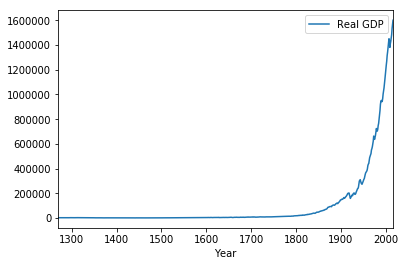

In [12]:
#first look at the data
new_GDP.plot(kind= 'line', x='Year', y='Real GDP')



The Hockey Stick: GDP appears to have been almost flat from 1300 to 1800.
From then on, it grew exponentially. 

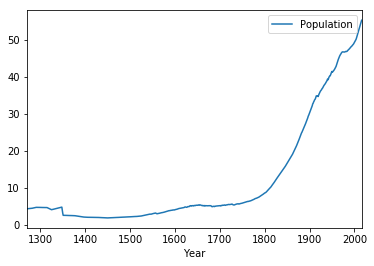

In [14]:
#Next, lets look at Population growth
new_GDP.plot(kind= 'line', x='Year', y='Population')


The population growth chart is roughly the same shape as GDP although the positive inflection point preceeds GDP by about 100 years. The population of England approximately tripled in the 1800s. Perhaps this rapid rise in population led to the exponential growth in GDP in the 1900s. 

In [55]:
# Calculate correlation coeffcient between Real GDP and Population
new_GDP['Population'].corr(new_GDP['Real GDP'])

0.831626213183195

Unsurprisingly, real GDP and population are highly positively correlated

##To further examine the trends, lets seperate the dataframe into two periods: Before 1800 and after 1800


In [0]:

GDP_early = new_GDP[(new_GDP['Year'] < 1800)]

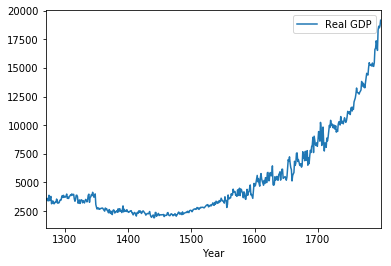

In [25]:
#plot of real GDP before 1800. 
GDP_early.plot(kind= 'line', x='Year', y='Real GDP')


At first glance, GDP looks to have grown significantly over this early period. Let's dig into the numbers:

In [33]:
#GDP in 1270:
print(f'GDP in 1270 is: {GDP_early.iloc[0,4]}')


#GDP in 1799:
print(f'GDP in 1799 is: {GDP_early.iloc[529,4]}')



GDP in 1270 is: 3518.0
GDP in 1799 is: 19169.0


From 1270 to 1799, GDP increased by 5.4x. On a compounded annual basis this represents less than one third of one percent. 

In [0]:
#now lets look at the later period: 1800 to present

GDP_late = new_GDP[(new_GDP['Year'] > 1800)]

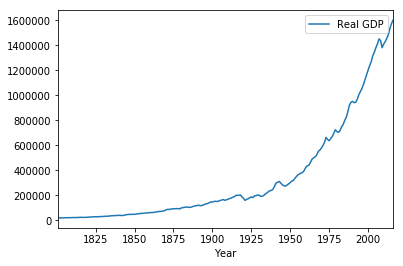

In [26]:
GDP_late.plot(kind= 'line', x='Year', y='Real GDP')


In [41]:
#GDP in 1800:
print(f'GDP in 1800 is: {new_GDP.iloc[530,4]}')


#GDP in 2016:
print(f'GDP in 2016 is: {new_GDP.iloc[746,4]}')


GDP in 1800 is: 20098.0
GDP in 2016 is: 1600372.0


While both charts give the appearance of growth, the post-1800 period trounces the prior 500 years: GDP from 1800 to 2016 increased by a staggering 79x or a 2.05% compound annual growth rate!




#Now let's pull in some wage data from a separate CSV file

In [0]:


wages_df = pd.read_csv('wages_csv.csv')


In [44]:
wages_df.head()

,Source,"Using preferred full employment earnings and CPI series. Traditional measure based on daily wage rates in England before 1750, Index 1900=100",Growth,10 year average,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1270,28.868052,-2.39,-2.39,NaN,NaN,NaN
1,1271,23.036657,-20.20,-11.30,NaN,NaN,NaN
2,1272,18.599560,-19.26,-13.95,NaN,NaN,NaN
3,1273,25.647871,37.90,-0.99,NaN,NaN,NaN
4,1274,23.418401,-8.69,-2.53,NaN,NaN,NaN


In [0]:
#dropping NaN columns

wages_df = wages_df.drop(wages_df.columns[[4,5,6]], axis=1) 

In [46]:
wages_df.head()

,Source,"Using preferred full employment earnings and CPI series. Traditional measure based on daily wage rates in England before 1750, Index 1900=100",Growth,10 year average
0,1270,28.868052,-2.39,-2.39
1,1271,23.036657,-20.20,-11.30
2,1272,18.599560,-19.26,-13.95
3,1273,25.647871,37.90,-0.99
4,1274,23.418401,-8.69,-2.53


In [0]:
#renaming columns to make the DF easier to work with
wages_df = wages_df.rename(columns={'Source': 'Year', 'Using preferred full employment earnings and CPI series. Traditional measure based on daily wage rates in England before 1750, Index 1900=100':'Weekly Real Wages (indexed to 1900)', '10 year average': '10 year average wage growth rate', 'Growth':'Wage Growth'}, inplace=False)


In [0]:
#merging original GDP dataframe with new wages dataframe on 'Year'
final_df = pd.merge(new_GDP, wages_df, on='Year')


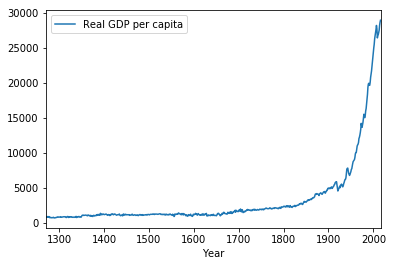

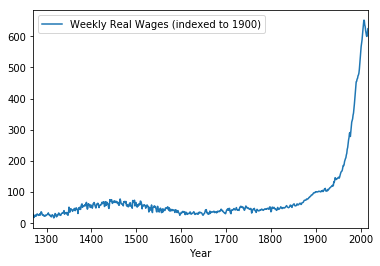

In [51]:
#charts of Real GDP per capita and Weekly Real Wages
final_df.plot(kind= 'line', x='Year', y='Real GDP per capita')
final_df.plot(kind= 'line', x='Year', y='Weekly Real Wages (indexed to 1900)')


To explore the idea of income inequality, let's create a new column that divides Real GDP per capita by Weekly Real Wages.
An increasing ratio would indicate that the economy overall is growing faster than average wages and suggest that economic growth is not benefitting the population equally.

In [0]:
final_df['Ratio of GDP per capita to Wages'] = final_df['Real GDP per capita'] / final_df['Weekly Real Wages (indexed to 1900)']

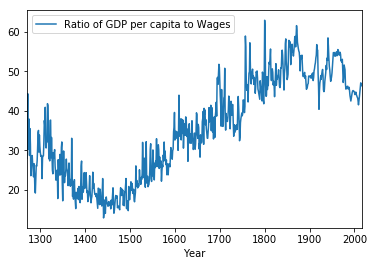

In [53]:
final_df.plot(kind= 'line', x='Year', y='Ratio of GDP per capita to Wages')


Interestingly, this metric rose consistently from the mid 1400's until the late 1800's before flattening out. 


Given that the vast majority of economic growth over this time period occured after 1800, it is encouraging to see this metric flatten out and even decline in the second half of the 1900's. This may suggest that economic growth is materializing in higher wages for the average worker rather than just accruing to a small portion of the population.



